# <span style="color:darkred">Data extract, manipulation and visualization</span>
Developer: Henriette Steenhoff



### <span style="color:darkred">Providers of data and recipients of result</span>
#### Jesper Bo Sembach, Niels Beuschau
*Master Thesis in Internet Security and Ransomware Detection*<br></br>
The Technical University of Denmark (DTU), June 2017

#### <span style="color:darkred">Purpose</span>
This code was made for extracting important data for analysis and results for the Master Thesis of Jesper Bo Sembach and Niels Beuschau. The code extracts and manipulates data from their test environment into correct data structures for visualization and performance analysis. 

----

### <span style="color:darkred">The code</span>

#### <span style="color:darkred">Functions</span>
For code ledgibility

In [23]:
# -------------------------------------------------------------------------------- #
# The Technical University of Denmark, June 2017
# Developer: Henriette Steenhoff, s134869
# Purpose:   Analysis and visualization of performance measures for Master Thesis of 
#            Jesper Bo Sembach and Niels Beuschau
# -------------------------------------------------------------------------------- #

# IMPORTS
import re
import json
# Only importing needed modules to avoid os.open being chosen instead of built-in open
from os import path, chdir, makedirs, listdir, getcwd 
import time
import numpy as np
import pylab as pl
import matplotlib as plt
%matplotlib inline

#import plotly
#import plotly.plotly as py
#from IPython.display import Image 
#import plotly.graph_objs as go
# API access to plotting tools
#plotly.tools.set_credentials_file(username='frksteenhoff2', api_key ='duu8hsfRmuI5rF2EU8o5')

basePath    = "C:/Users/frksteenhoff/Documents/GitHub/MSc-Sembach-Beuschau_Jun2017/"
pathToPlots = basePath + "Visualization"

# -------------------------------------------------------------------------------- #

# HELPER FUNCTIONS FOR THE VISUALIZATION SCRIPT BELOW

# Function creating correct layout style for each type of plot 
def setLayoutOptions(headTitle, ytitle):
    layout= go.Layout(
            title= headTitle.upper(),
            hovermode= 'closest',
            xaxis= dict(
                title= 'Time (0.5 second interval)',
                ticklen= 5,
                zeroline= True,
                gridwidth= 2,
            ),
            yaxis=dict(
                title= ytitle,
                ticklen= 5,
                gridwidth= 2,
            ),
            showlegend= False
    )
    return layout


# Remove all occurences of AppData paths from a given list of paths
def removeAppData(lst):
    outFile = []
    for f in lst:
        current_file = f.split('*')[0]
        pattern = re.compile('.*AppData.*')
        if not pattern.match(current_file):
            outFile.append(f)
    return outFile


# Split information from txt file in title and data
def splitTitleAndFiles(line, lineNumber):
    temp = []
    separteValues = []
    
    temp = line.strip('\n')
    titleAndList = temp.split(';')
    title = titleAndList[0]
    #print title
        
    separateValues = titleAndList[1].split('?')
     
    if lineNumber in range(11,16):
        values = [val.replace(',','.') for val in separateValues]
    else:
        values = separateValues
    
    return title, values

    
# Create cpu, ram, hdd, handle and thread count plots
def createPerformancePlots(title, listValues, lineNumber, filename, folder, pathToPlots, pathToFiles):
    mode = 'lines'
    
    # Set plotting marker
    #if lineNumber == 11:
    #    mode = 'markers'
    #else:
    #    mode = 'lines'
        
    trace1 = go.Scatter(
        x = range(0,len(listValues)),
        y = listValues, 
        mode = mode,
        marker = dict(
            size = 3
        )
    )    
    
    # Choose right values for plotting cpu, ram or hdd, handle and thread count
    if lineNumber == 11:
        layout = setLayoutOptions(title, 'Percent')
    if lineNumber == 12:
        layout = setLayoutOptions(title, 'MB')
    elif lineNumber == 13:
        layout = setLayoutOptions(title, 'Speed - missing unit')
    elif lineNumber == 14:
        layout = setLayoutOptions(title, 'Number of handles')
    elif lineNumber == 15:
        layout = setLayoutOptions(title, 'Number of threads')
    else:    
        layout = setLayoutOptions(title, 'Byte')

    data = [trace1]
    fig  = go.Figure(data=data, layout=layout)
    
    # Create folder for plots if not exists
    dir_name = pathToPlots + "/" + folder
    if not path.exists(dir_name):
        makedirs(dir_name)
    chdir(dir_name)
    
    # Save image to file
    py.image.save_as(fig, filename=filename.strip('.txt') + "-"+ title + '.png')    
    chdir(pathToFiles)
    time.sleep(2)
    
    
# ('File sizes over time', fileSizes, files, pathToPlots, pathToFiles)
def createFileSizePlots(title, size_list, filename, folder, plot_path, file_path):
    dir_name = plot_path + "/" + folder
    chdir(dir_name)
    
    plt.scatter(range(0,len(size_list)), size_list, '-o', alpha=0.5)
    plt.title(title)
    plt.xlabel('Byte')
    plt.ylabel('Time (0.5 second interval)')
    plt.savefig(title + '-size.png')
    chdir(file_path)

def findFilePath(fileList, splitCrit):
    fileNames = []
    
    for f in fileList:
        pathStr = f.split(splitCrit)[0]
        fileNames.append(re.sub(r'\D:\\{1,4}\w*\\{1,4}\w*\\{1,4}', '', pathStr))
    return fileNames

        
def getFileSizes(filename):
    sizeOfFiles = {}
    
    with open(filename, 'r') as f:
        paths = f.readlines()
    
    for lines in paths:
        values = lines.split('?')
        keyy = values[0].strip("C:\Users\Baseline\\")
        sizeOfFiles[keyy] = values[1]                                   
    return sizeOfFiles

                                   
# Here assuming that all files can be found in size_dict (from baselinedata.txt)                           
def createFileSizeList(files, size_dict):
    sizeList = []
    for f in files:
        # Strip f of excess backslashes
        print f
        keyy = re.sub(r'\+','_', f)
        print keyy
        key2 = re.sub(r'_', '', f)
        print key2
        sizeList.append(size_dict[key2])
    return sizeList
                   
def createBoxplot(plottingValues, labels, filename, plotTitle, xlabel, ylabel):
    # Creating figure and setting plotting type
    pl.figure(figsize=(10,7))
    pl.boxplot(plottingValues)

    # Values - for ledgibility
    pl.title(plotTitle)
    pl.xlabel(xlabel)
    pl.ylabel(ylabel)
    # Label values
    pl.xticks(range(1,len(labels)+1), labels)
    pl.savefig(filename + '.png')


#### <span style="color:darkred">Read all files in each folder of "Speciale"</span>
All data from folder ``Speciale``, found [here](www.github.com/frksteenhoff/MSc-Niels-Jesper-June2017/) on Github will, be used for extracting visualizations. The visualizations will be placed in a separate folder with the same structure as the ``Speciale`` folder, named ``Visualization``.

Current folder: baseline
Current folder: hp1
Current folder: hp2
Current folder: hp5
Current folder: sh3
Current folder: sh5
Current folder: sh10
Current folder: sh15

All files read
Box plots created:


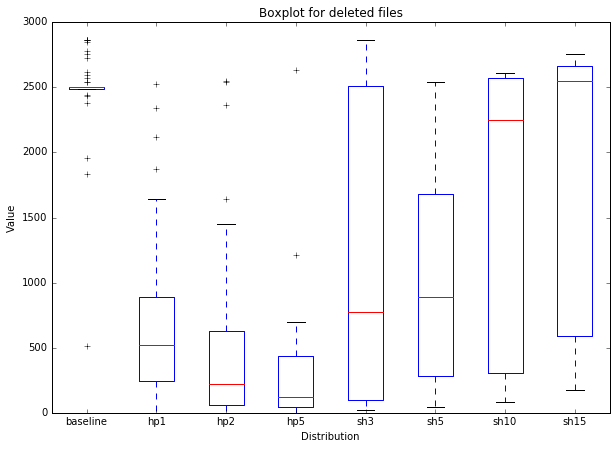

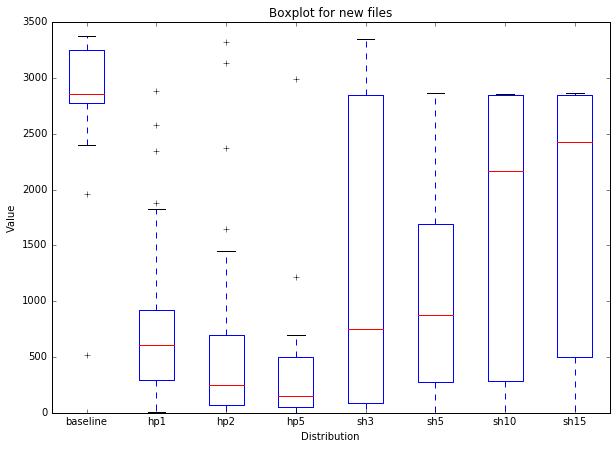

In [24]:
# -------------------------------------------------------------------------------- #
# The actual visualization script
# -------------------------------------------------------------------------------- #
# Basic inits
folders = ['baseline', 'hp1', 'hp2','hp5', 'sh3', 'sh5', 'sh10', 'sh15']
lineNumber = 0
boxplotDel = []
boxplotNew = []
obsMon = []
fileSizes = []
delLst = []
newLst = [] 
chdir(basePath)
baselineData = getFileSizes('BaselineFileData.txt')

# For all folders in Speciale, access each folder and  'do something'
for folder in folders:
    pathToFiles   = basePath + "Speciale/" + folder 
    chdir(pathToFiles)
    selectedFiles = [file for file in listdir('.') if file.endswith('.txt')]
    print "Current folder: " + folder
    
    # For each file in current folder, read content 
    for files in selectedFiles:
        # Read each line and split content into dictionary
        with open(files, 'r') as f:
            content = f.readlines()
        
        for lines in content:
            # Create list of values for boxplot of number of deleted files
            if lineNumber == 8:
                delFile, delCnt = splitTitleAndFiles(lines, lineNumber)
                delLst.append(int(delCnt[0]))
        
            # Create list of values for boxplot of number of new files
            if lineNumber == 9:
                newFile, newCnt = splitTitleAndFiles(lines, lineNumber)
                newLst.append(int(newCnt[0]))
                
            # If we have data for cpu, ram, hdd, thread or handle count 
            elif lineNumber in range(11,16) and lineNumber == -1:
                # Get attribute and list of values
                title, listValues = splitTitleAndFiles(lines, lineNumber)
                    
                # Create plots cpu, ram, hdd, handle and thread count
                createPerformancePlots(title, listValues, lineNumber, files, folder, pathToPlots, pathToFiles)
               
            # If fileMonObservations
            elif (lineNumber == 19) and lineNumber == -1:
                # Get attribute and list of values
                title, listValues = splitTitleAndFiles(lines, lineNumber)
                    
                # Extract all files not in folder AppData
                obsMon = removeAppData(listValues)
                filePaths = findFilePath(obsMon, '*')
                fileSizes = createFileSizeList(filePaths, baselineData)
                createFileSizePlots('File sizes over time', fileSizes, 0, files, pathToPlots, pathToFiles)
            
            ## Nothing implemented using sepcific information in file 
            #else:
            #    print ''#lines.strip('\n').split(';')[0].ljust(24), "nothing implemented"
            lineNumber += 1
        lineNumber = 0
        fileSizes = []
        
    # Create 2-d list for boxplots
    boxplotDel.append(delLst)    
    boxplotNew.append(newLst)
    delLst = []
    newLst = []
    
print "\nAll files read"

# Creating and saving boxplots for deleted and new files
chdir(pathToPlots)
createBoxplot(boxplotDel, folders, 'delFiles', 'Boxplot for deleted files', 'Distribution', 'Value')
createBoxplot(boxplotNew, folders, 'newFiles', 'Boxplot for new files', 'Distribution', 'Value')
print "Box plots created:"

----
### Shortcut to simple styling tricks
``<span style="color:darkred"></span>``